In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data-imputed cleaned dataset
df = pd.read_csv("data/cleaned_school_data.csv")

# Foundational Educational Feature Analysis

## Correlation Between Number of Applications and HSPHS Admission

I first want to determine if there is a correlation between number of applications and admissions to a **highly-selective public high school (HSPHS)**.

In [2]:
# Determine and display Pearson's product-moment correlation 
corr = df["applications"].corr(df["acceptances"])
print(f"Raw Applications vs Acceptances Correlation: {corr:.4f}")

Raw Applications vs Acceptances Correlation: 0.8017


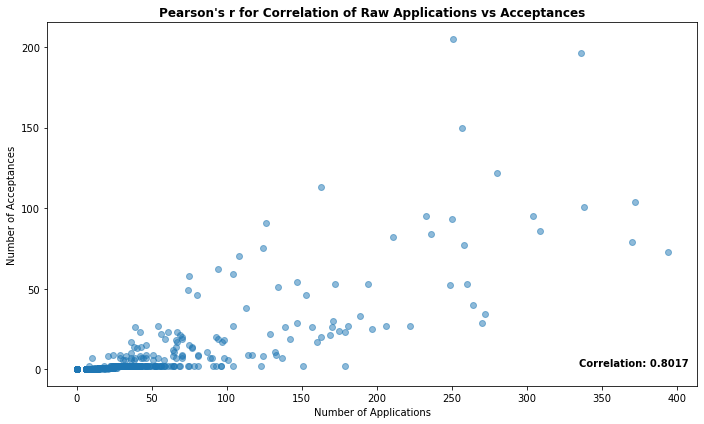

In [3]:
# Plot Pearson's r for applications and acceptances
plt.figure(figsize = (10,6))
plt.scatter(df["applications"], df["acceptances"], alpha = 0.5)
plt.title("Pearson's r for Correlation of Raw Applications vs Acceptances", weight = "bold")
plt.xlabel("Number of Applications")
plt.ylabel("Number of Acceptances")
# Display correlation coefficient within plot
text = f"Correlation: {corr:.4f}"
plt.text(0.85*df["applications"].max(), 0.01*df["acceptances"].max(), text, weight = "bold")
# Center the plot
plt.tight_layout()
plt.show();

The correlation coefficient between HSPHS applications and admissions was approximately **0.8017**, which suggests that there is a **strong positive correlation** between a school's raw number of applications and its admissions numbers to HSPHS. However this doesn't paint the entire picture so I wanted to continue on and see the relationship between **raw number of applications** and **application rate**.

## Correlation Between Application Rate vs Acceptances

In [4]:
# Create new feature for application rate
df["application_rate"] = df["applications"] / df["school_size"]

# Calculate the correlation coefficient between application rate vs acceptances
rate_corr = df["application_rate"].corr(df["acceptances"])
print(f"Application Rate vs Acceptances Correlation: {rate_corr:.4f}")

Application Rate vs Acceptances Correlation: 0.6562


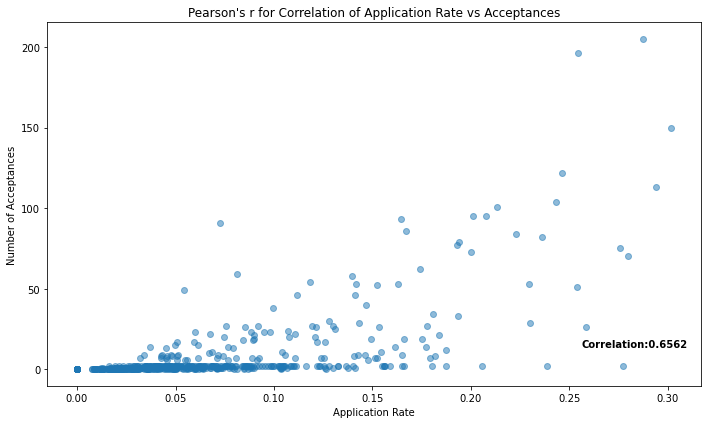

In [5]:
# Plot Pearson's r for application rate vs acceptances
plt.figure(figsize = (10,6))
plt.scatter(df["application_rate"], df["acceptances"], alpha = 0.5)
plt.title("Pearson's r for Correlation of Application Rate vs Acceptances")
plt.xlabel("Application Rate")
plt.ylabel("Number of Acceptances")
# Display correlation coefficient within plot
text = f"Correlation:{rate_corr:.4f}"
plt.text(0.85*df["application_rate"].max(), 0.066*df["acceptances"].max(), text, weight = "bold")
# Center the plot
plt.tight_layout()
plt.show();

Application rate has a correlation coefficient of approximately **0.6588** while raw number of applications has a correlation coefficient of approximately **0.8017**. Given this it would be reasonable to state that raw number of applications is a better predictor of HSPHS admission than application rate.

## Student Perception vs Objective School Performance

I now want to quantify if there is a relationship between how students perceive their schools and how the school performs within objective measures of achievement such as test scores and HSPHS acceptance.

In [6]:
# Create a list which splices columns representing student perception 
# and objective school performance
selected = df.columns[11:17].to_list() + df.columns[21:24].to_list()

# Create and calculate a correlation matrix between these features
corr = df[selected].corr()
corr_matrix = corr.loc[selected[:6], selected[6:]]
corr_matrix

,reading_scores_exceed,math_scores_exceed,application_rate
collaborative_teachers,0.280847,0.261589,0.138905
supportive_environment,0.412769,0.394789,0.209261
effective_school_leadership,0.111293,0.092975,0.064373
strong_family_community_ties,0.221345,0.198765,-0.002101
trust,0.042003,0.046401,0.029752
disability_percent,-0.491570,-0.496539,-0.215856


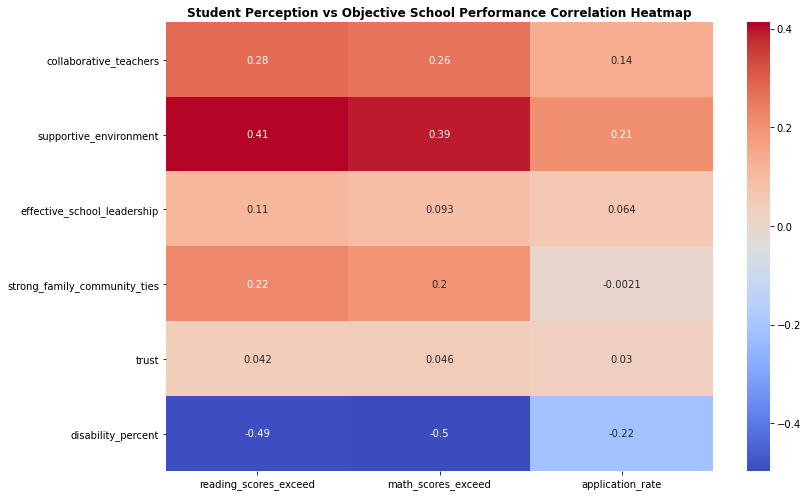

In [7]:
# Create a heatmap to better visualize this correlation matrix
plt.figure(figsize = (12,7))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Student Perception vs Objective School Performance Correlation Heatmap", weight = "bold")
plt.tight_layout()
plt.show();

The heatmap visualization shows that there is a stronger correlation between student perception of a **supportive environment** and **rigorous instruction** and better objective school performance outcomes than compared to other student perception metrics.

# Individual School Student Success Feature Analysis

## School Size Correlation with Overall Student Success

I wanted to determine whether school size has an impact on performance regarding both objective measures of student success as well as acceptance to HSPHS. I did this by defining what categorized a small school vs a large school and then calculating the performance of these two categories to determine if there was a correlation within student achievement or HSPHS acceptance outcomes.

In [8]:
# Define median as threshold for small and large schools
med_size = df["school_size"].median()

# Create a new feature for school size classification
df["size_classification"] = "large"
df.loc[df["school_size"] <= med_size, "size_classification"] = "small"

In [9]:
# Aggregate average values for both objective measures of success as well as HSPHS acceptance
aggregated_avg = df.groupby("size_classification").agg({
    "student_achievement" : "mean",
    "reading_scores_exceed" : "mean",
    "math_scores_exceed" : "mean",
    "acceptances" : "mean"
}).reset_index()

# Display the aggregated averages for both small and large schools
aggregated_avg.style.hide_index()

size_classification,student_achievement,reading_scores_exceed,math_scores_exceed,acceptances
large,3.457568,0.535304,0.498581,12.675676
small,3.348691,0.396141,0.333389,2.379195


From the aggregated averages comparing schools based on whether they were large or small, there is an overall trend in which **large schools** far outperform **smaller schools**.

## Proportion of Top Schools Which Account 

A thorough investigation into features which contribute to HSPHS acceptance would be incomplete without understanding how **"elite middle schools"** play into the acceptance process. As with most other educational merit-based application, those with disproportionate access to either prestige or educational resources would have an advantage. 

**Therefore I calculated the proportion of HSPHS acceptances the top 5%, 10%, and 20% of schools accounted for:**

In [10]:
# Sort DataFrame based on number of acceptances in descending order
df_sort = df.sort_values(by = "acceptances", ascending = False)

# Create a new variable for total number of HSPHS acceptances
total_acceptances = df_sort["acceptances"].sum()

In [11]:
# Sort DataFrame based on number of acceptances in descending order
df_sort = df.sort_values(by = "acceptances", ascending = False)

# Create list of proportions to be calculated
percentages = [0.05, 0.10, 0.20]

# Calculate proportion of HSPHS acceptances for each school percentage
results = []
for percentage in percentages:
    num_schools = int(percentage * len(df_sort))
    top_schools = df_sort.head(num_schools)
    top_school_acceptances = top_schools["acceptances"].sum()
    accept_percentage = top_school_acceptances / total_acceptances * 100
    results.append([percentage, accept_percentage])
    
# Convert results list into DataFrame
df_proportions = pd.DataFrame(results, columns = ["Percentage of Top Schools", "Percentage of Total HSPHS Acceptance"])
df_proportions

,Percentage of Top Schools,Percentage of Total HSPHS Acceptance
0,0.05,56.825824
1,0.10,75.453934
2,0.20,89.621161


As can be seen from the table, the top percentage of schools contribute to the vast majority of HSPHS acceptance. The **top 5%** of schools accounts for close to **60%** of HSPHS acceptances by themselves. And even more surprisingly, the **top 20%** of schools accounts for almost **90%** of HSPHS acceptances. There is clearly a disparity in outcomes between the top schools sending students to HSPHS when compared to other schools throughout NYC.

## School with Highest HSPHS Acceptance Rate

Continuing on with this exploration into the schools which send the most students to HSPHS, it would only make sense to determine both which school sends the highest percentage of its students to HSPHS as well as what proportion of total HSPHS acceptances this 1 school contributes.

In [12]:
# Create new feature in DataFrame for Per Student Odds of HSPHS acceptance
df["per_student_acceptance"] = df["acceptances"] / df["school_size"]

# Locate the school with best per-student odds of HSPHS acceptance
highest_odds = df.loc[df["per_student_acceptance"].idxmax()]

# Calculate proportion of total HSPHS acceptances this one school accounts for
highest_school_percentage = (highest_odds["acceptances"] / total_acceptances) * 100

# Create dictionary to display school info with highest odds of HSPHS acceptance

best_school_dict = {
    'School Name' : highest_odds["school_name"],
    "Per Student HSPHS Odds" : f"{highest_odds['per_student_acceptance']*100:.2f}%",
    "Percentage of Total HSPHS Acceptance" : f"{highest_school_percentage:.2f}%"
}
# Display the school
best_school_dict

{'School Name': 'THE CHRISTA MCAULIFFE SCHOOL\\I.S. 187',
 'Per Student HSPHS Odds': '23.48%',
 'Percentage of Total HSPHS Acceptance': '4.60%'}

The school with the highest **per student odds** of sending a student to a HSPHS is **The Christa McAuliffe School (IS 187)** in Dyker Heights, Brooklyn, 11219. This school sends approximately **23.48%** of its students to a HSPHS as well as accounting for **4.60%** of all HSPHS acceptances within almost 600 schools within New York City.

In [20]:
# Export sorted DataFrame to CSV dataset file
df_sort.to_csv("data/exploratory_sorted_data.csv")